<a href="https://colab.research.google.com/github/Monichaudhary2004/Monichaudhary/blob/main/Mall_Customer_Data_Clustering_(KMeans_Hier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import missingno as msno
from datetime import date
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import iplot
import plotly.graph_objs as go
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,RobustScaler,MaxAbsScaler,StandardScaler,\
                                    OneHotEncoder, OrdinalEncoder

In [ ]:
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from itertools import combinations, product
from sklearn.metrics import silhouette_samples


In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV,GridSearchCV
from sklearn.inspection import permutation_importance


In [ ]:
pip install scikit-optimize


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 1.2 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Categorical, Integer

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,\
                            r2_score,mean_absolute_percentage_error
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score

In [ ]:
import pickle
import json

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
new_df = df.drop('CustomerID', axis=1)

In [ ]:
new_df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


In [ ]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


**FEATURE SCALING**

In [ ]:
numerical_features = new_df.select_dtypes(exclude = ['object']).columns.tolist()
categorical_featrues = new_df.select_dtypes(exclude = ['object']).columns.tolist()

In [ ]:
new_df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df1 = new_df.copy()
df1['Gender'] = df1['Gender'].map({'Male':1, 'Female':0})

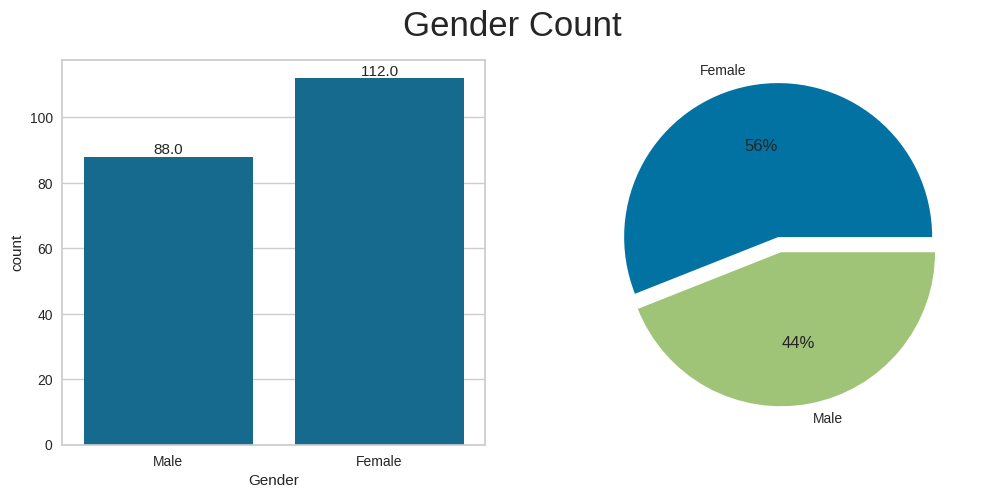

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
ax = sns.countplot(df, x = 'Gender', ax = axes[0])
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.75, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.subplot(1,2,2)
plt.pie(df['Gender'].value_counts(), labels=['Female', 'Male'], explode=[0.1, 0], autopct='%.0f%%')
fig.suptitle('Gender Count', fontsize = 25)
plt.show()

**Numerical Features w.r.t Gender**

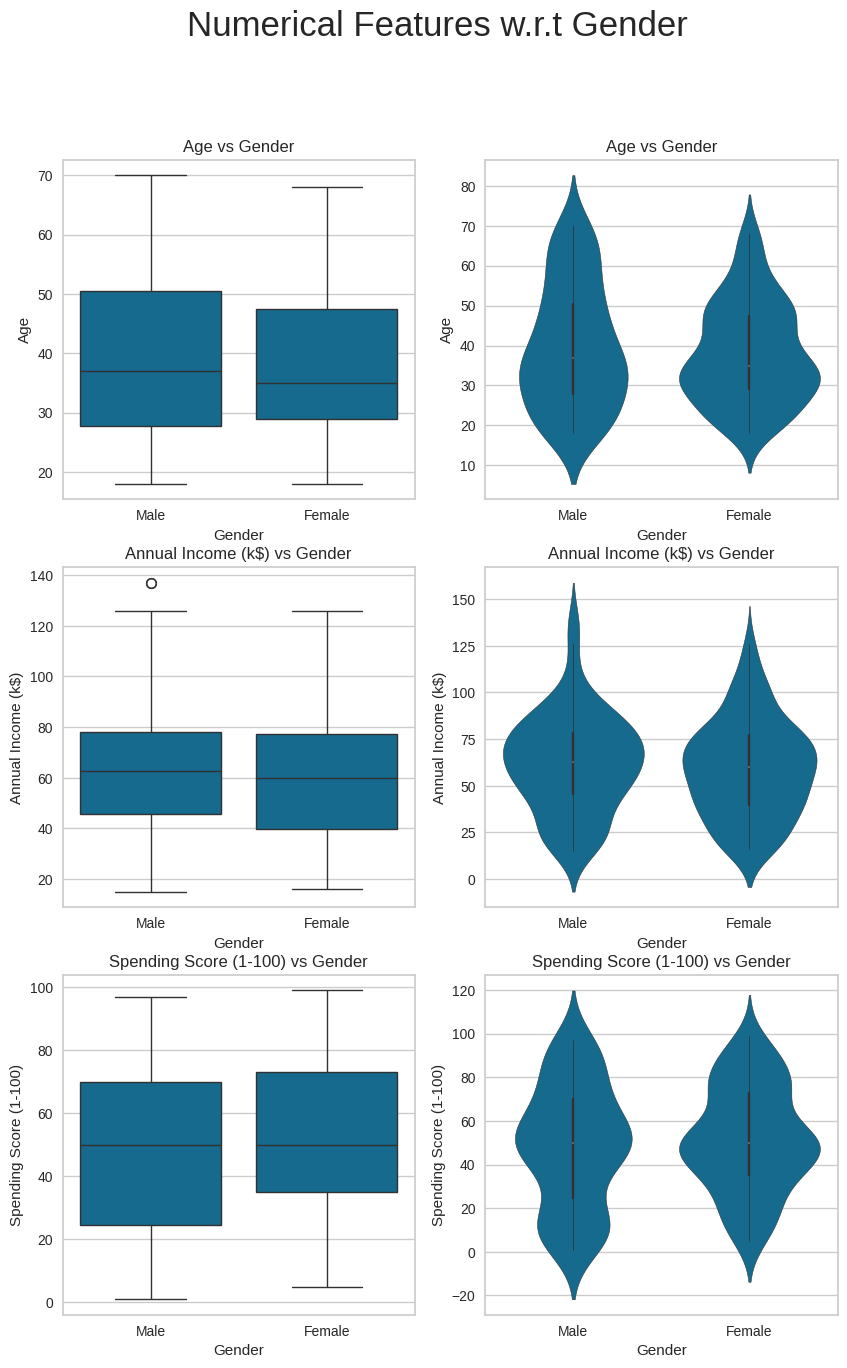

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols = 2,figsize = (10,15))
for i, j in enumerate(numerical_features):
    ax = sns.boxplot(x = 'Gender',y = j, data = df, ax = axes[i, 0])
    title = j + ' vs Gender'
    axes[i, 0].set_title(title)

    ax = sns.violinplot(x = 'Gender',y = j, data = df, ax = axes[i, 1])
    title = j + ' vs Gender'
    axes[i, 1].set_title(title)
fig.suptitle('Numerical Features w.r.t Gender', fontsize = 25)
plt.show()

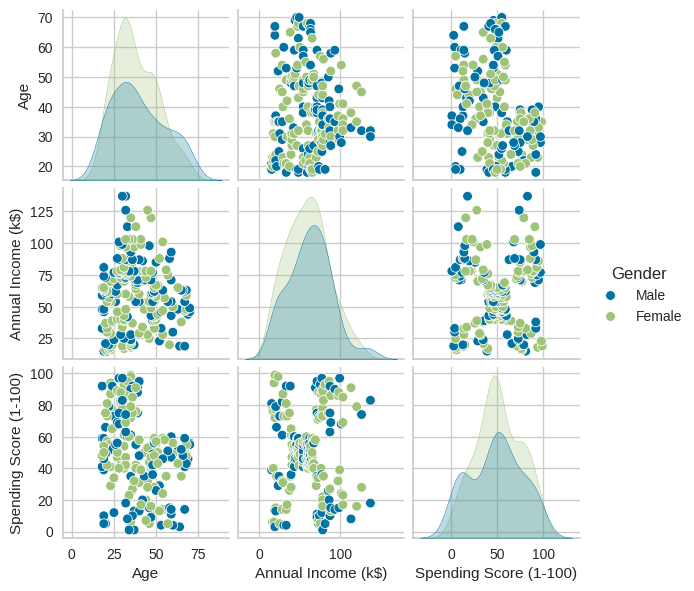

In [ ]:
sns.pairplot(df.drop(['CustomerID'],axis=1),hue='Gender',height=2)
plt.show()

**Numerical Vs Numerical Features**

In [ ]:
comb = list(combinations(numerical_features, 2))
print(comb)

[('Age', 'Annual Income (k$)'), ('Age', 'Spending Score (1-100)'), ('Annual Income (k$)', 'Spending Score (1-100)')]


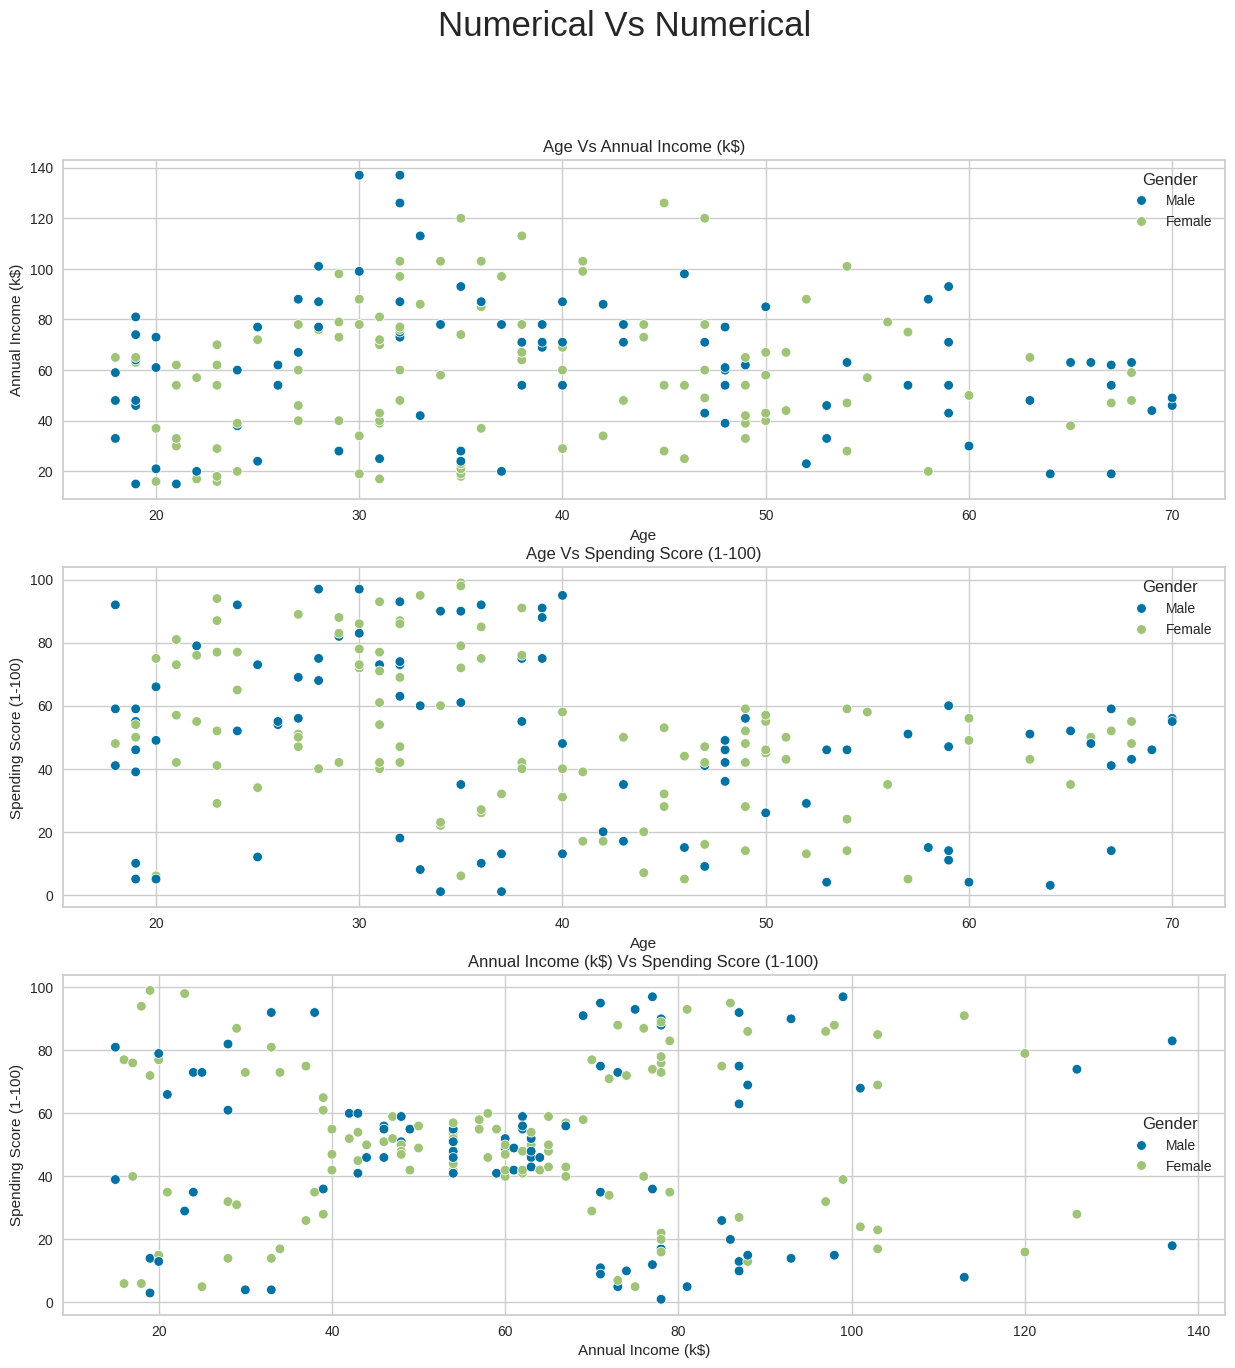

In [ ]:
fig, axes = plt.subplots(3, 1, figsize = (15, 15))
for i, c in enumerate(comb):
    sns.scatterplot(data = df, x = c[0], y = c[1], hue = 'Gender', ax = axes[i])
    axes[i].set_title(f"{c[0]} Vs {c[1]}")
fig.suptitle('Numerical Vs Numerical', fontsize = 25)
plt.show()

**Correlation Matrix**

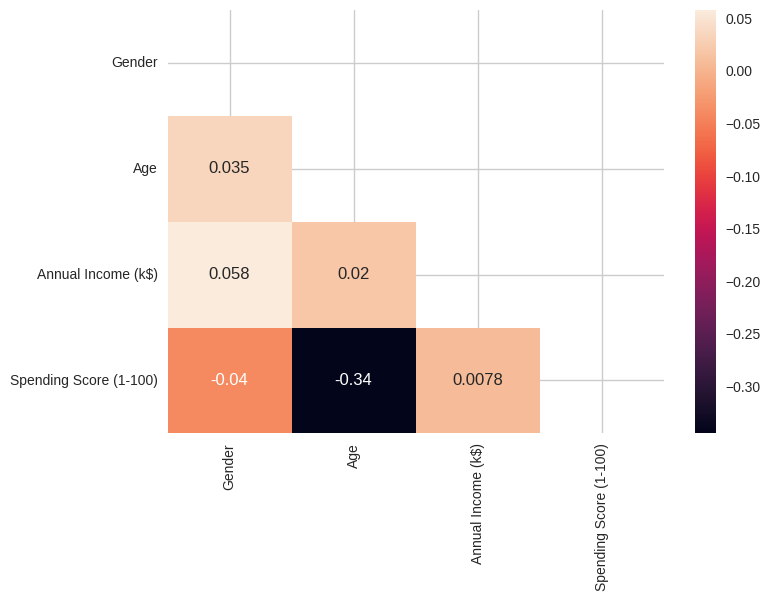

In [ ]:
ut = np.triu(df1.corr())
sns.heatmap(df1.corr(method = 'spearman'), annot = True, mask = ut)
plt.show()

**Data Distribution**

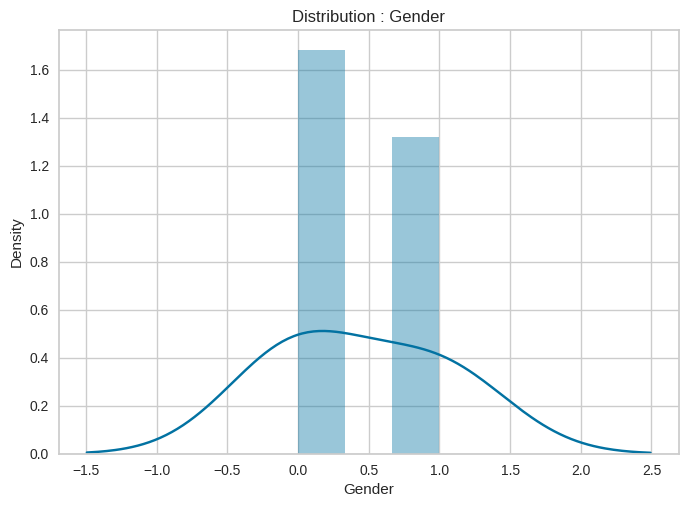

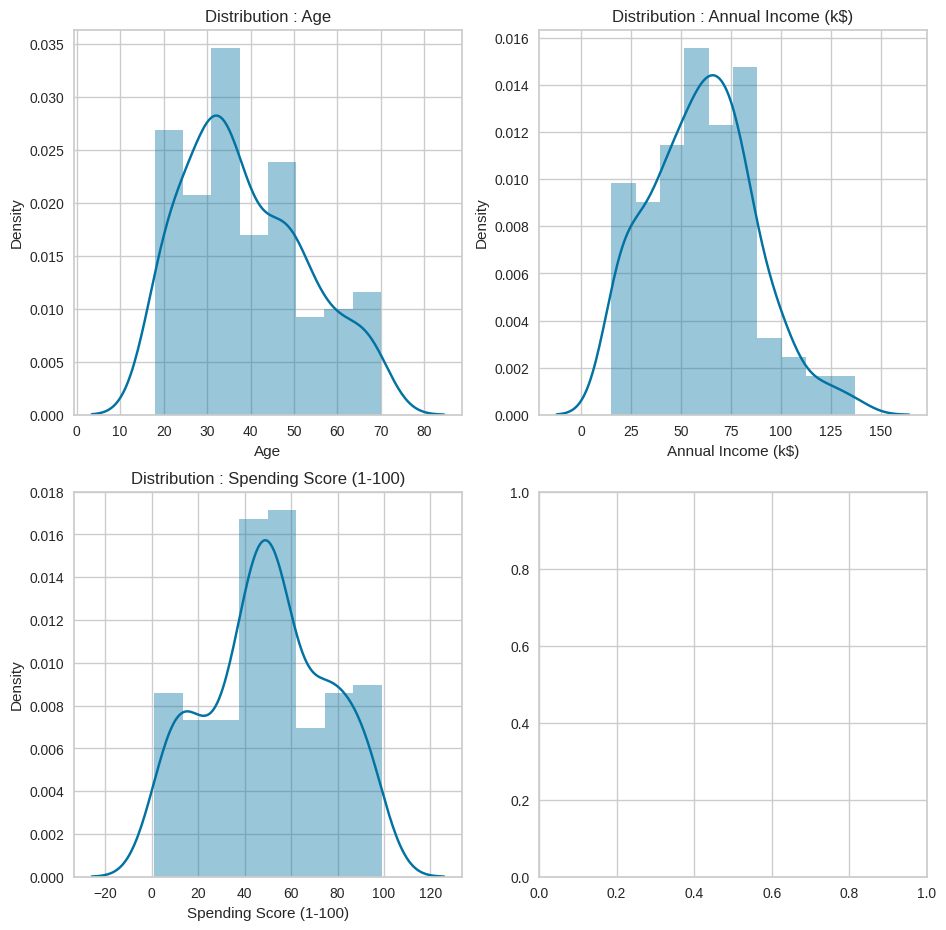

In [ ]:
sns.distplot(df1['Gender'],kde = True, kde_kws = {'bw' : 1})
title = 'Distribution : Gender'
plt.title(title)
plt.show()

fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (11,11))
for i, j in enumerate(numerical_features):
    plt.subplot(2,2,i+1)
    sns.distplot(df[j])
    title = 'Distribution : ' + j
    plt.title(title)
plt.show()

In [ ]:
df1.skew()

Gender                    0.243578
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

**Data Preprocessing**

In [ ]:
data_to_normalize = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data_to_normalize)
normalized_MinMax_df = pd.DataFrame(normalized_data, columns=data_to_normalize.columns)

In [ ]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_to_normalize)
normalized_Zscore_df = pd.DataFrame(normalized_data, columns=data_to_normalize.columns)

In [ ]:
def tracer(db, clu, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x = db[db[clu]==n]['Age'],
        y = db[db[clu]==n]['Spending Score (1-100)'],
        z = db[db[clu]==n]['Annual Income (k$)'],
        mode = 'markers',
        name = name,
        marker = dict(size = 5)
     )

def plot_silhouette(X, clusters):
    silhouette_avg = silhouette_score(X, clusters)
    sample_silhouette_values = silhouette_samples(X, clusters)

    y_lower = 10
    for i in range(len(set(clusters))):
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / len(set(clusters)))
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.title("Silhouette plot for the clusters")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.yticks([])
    plt.show()

**Clustering Algorithms & Clustering Analysis**

Distortion Score Elbow

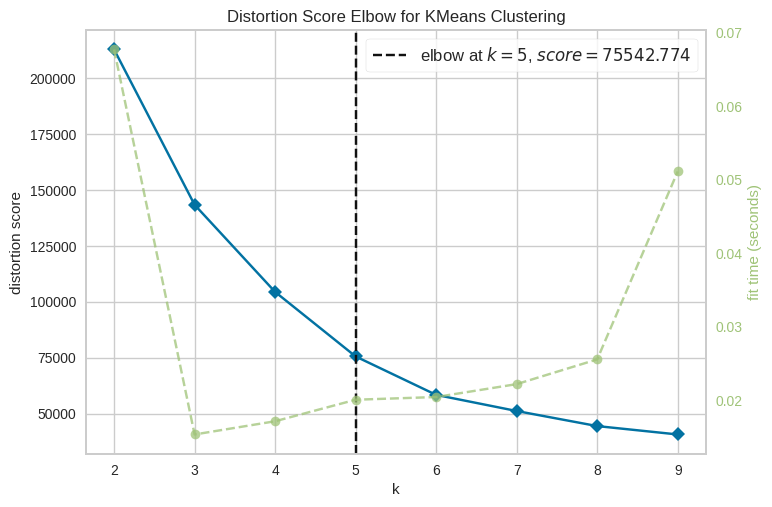

In [ ]:
model = KMeans(random_state=22)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df1)
visualizer.show()
plt.show()

Silhouette Score Elbow

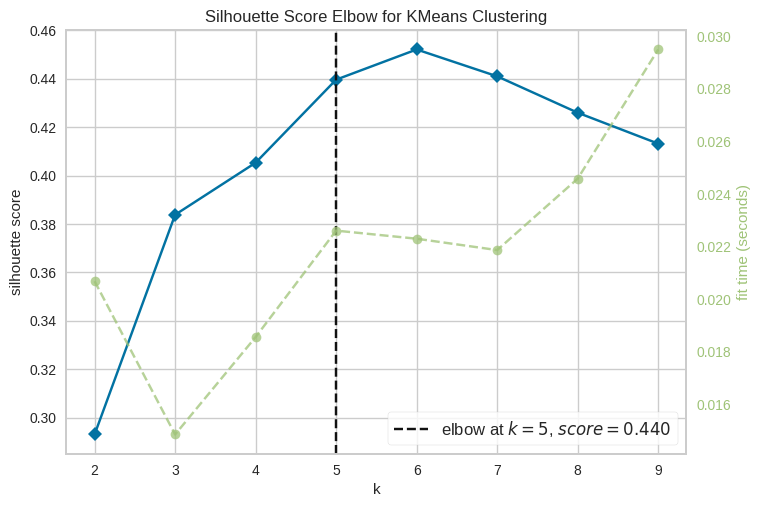

In [ ]:
model = KMeans(random_state=22)
visualizer = KElbowVisualizer(model, k=(2,10), metric = 'silhouette')
visualizer.fit(df1)
visualizer.show()
plt.show()

Silhouette score method indicates the best options would be 5 or 6 clusters. Let's compare both.

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(normalized_MinMax_df)
    wcss.append(kmeans.inertia_)
print(wcss)

[37.401482160359436, 22.56077488260975, 17.371946164404164, 12.650287676229915, 10.303964892534122, 8.385099035848985, 7.4634835751996285, 6.248886770318164, 5.483963011692648, 5.032571050877738]


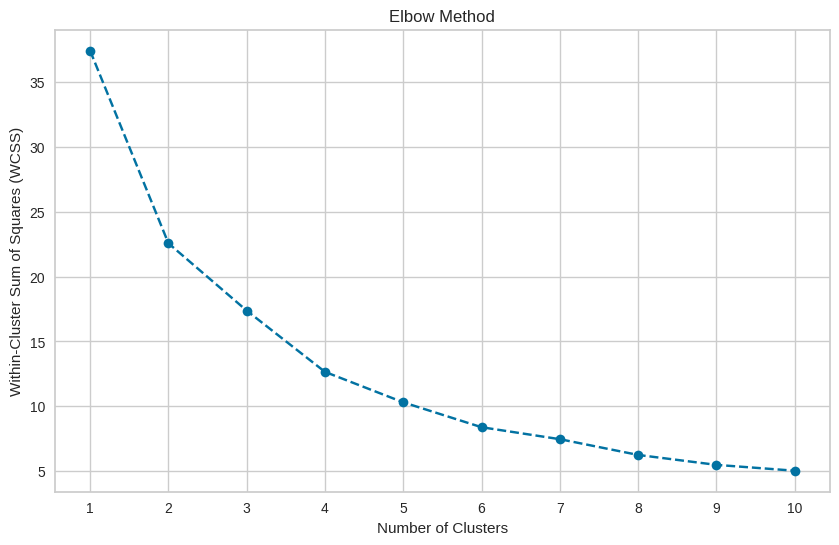

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(normalized_Zscore_df)
    wcss.append(kmeans.inertia_)
print(wcss)

[600.0, 389.3861889564371, 295.2122461555488, 205.22514747675922, 168.24758017556837, 133.86842085478852, 120.43283250037275, 103.81525583671635, 92.3494576711305, 82.88526644450903]


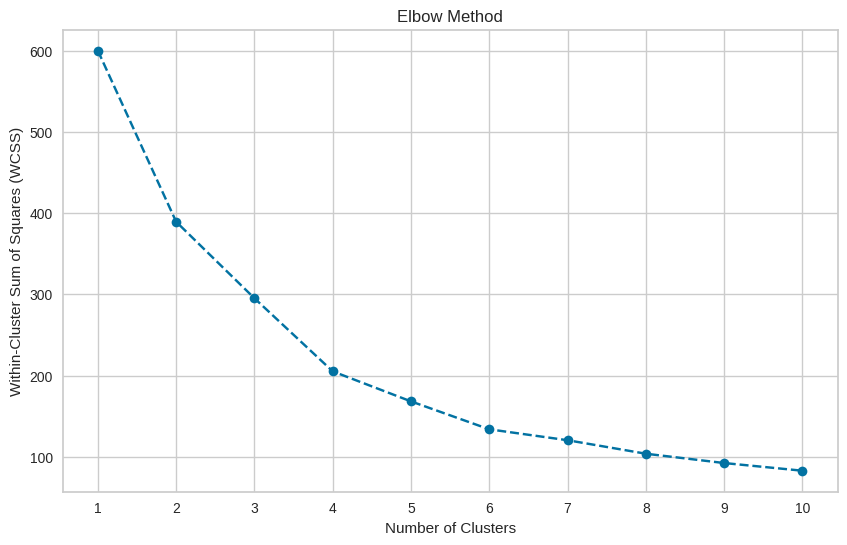

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [ ]:
df_clusters = df1.copy()

**KMeans Algorithm**

In [ ]:
km_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(df1) # initialise and fit K-Means model
df_clusters.loc[:,'KMeans5'] = km_5_clusters.labels_ # append labels to points

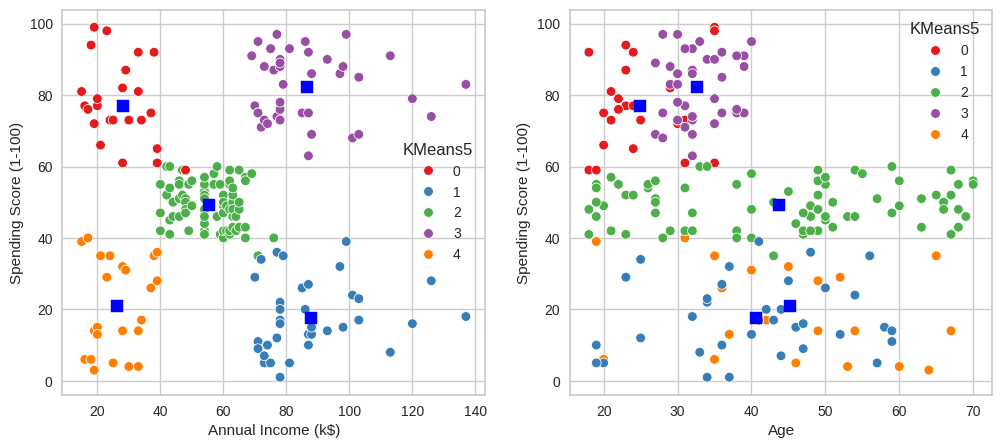

In [ ]:
fig1, axes = plt.subplots(1, 2, figsize=(12,5))

sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue='KMeans5', data=df_clusters, ax=axes[0], palette='Set1', legend='full')
sns.scatterplot(x = 'Age', y = 'Spending Score (1-100)', data=df_clusters, hue='KMeans5', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(km_5_clusters.cluster_centers_[:,2],km_5_clusters.cluster_centers_[:,3], marker='s', s=80, c="blue")
axes[1].scatter(km_5_clusters.cluster_centers_[:,1],km_5_clusters.cluster_centers_[:,3], marker='s', s=80, c="blue")
plt.show()

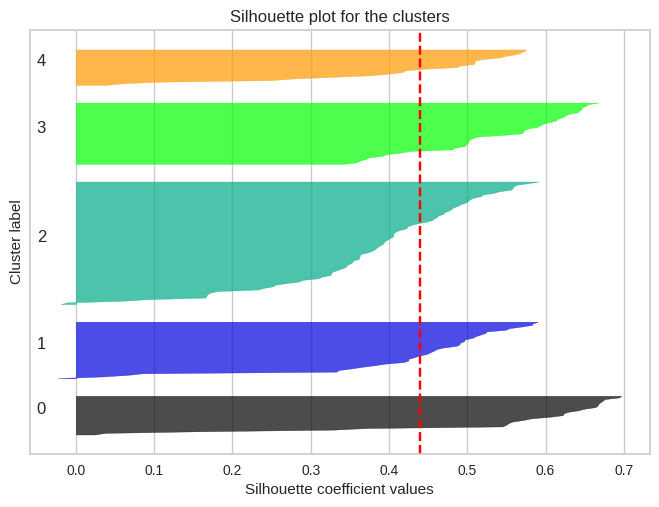

In [ ]:
plot_silhouette(df1, df_clusters.KMeans5)

**Hierarchical Algorithm**

In [ ]:
X = df.drop(columns=['CustomerID', 'Age'], axis=1).values

In [ ]:
X = df.drop(columns=['CustomerID', 'Age', 'Gender'], axis=1).values

In [ ]:
cluster = AgglomerativeClustering(n_clusters=5, metric="euclidean",linkage="ward")
labels_= cluster.fit_predict(df_clusters)

In [ ]:
labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

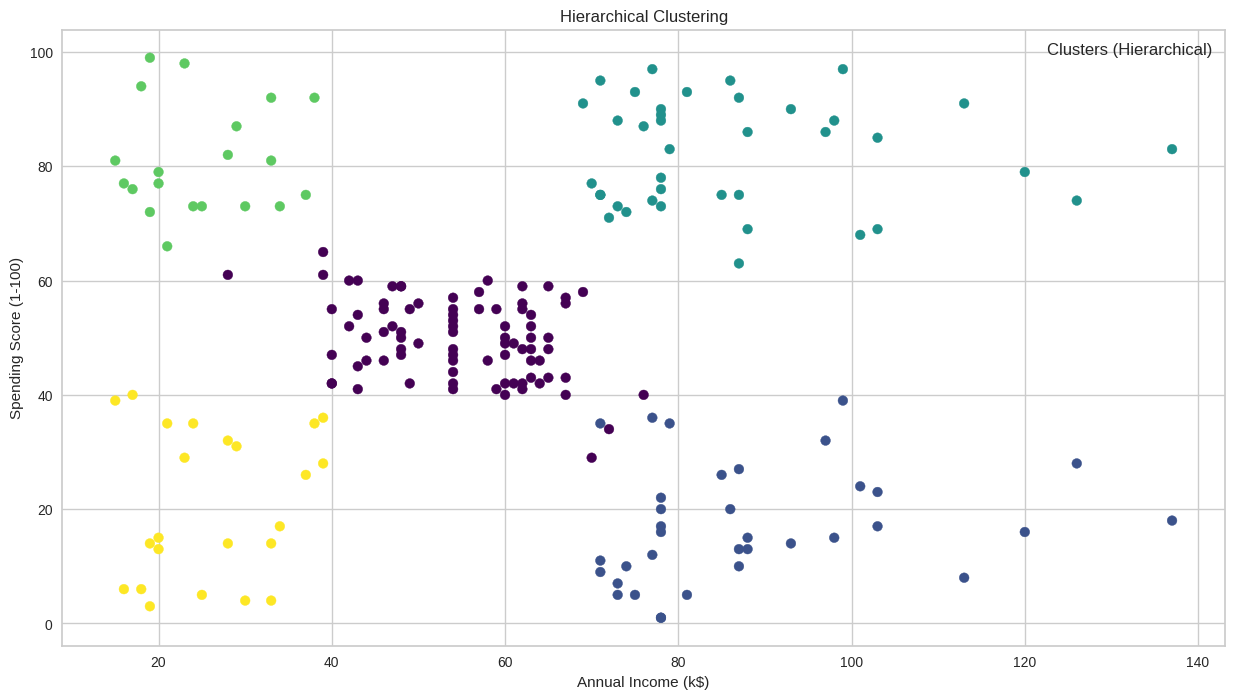

In [ ]:
plt.figure(figsize=(15, 8))
plt.scatter(df_clusters['Annual Income (k$)'], df_clusters['Spending Score (1-100)'], c=cluster.labels_, cmap='viridis', marker='o')
plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Clusters (Hierarchical)')
plt.show()

**EVALUATION**

In [ ]:
silhouette_scores = {}

silhouette_scores['Agglomerative'] = silhouette_score(df_clusters, labels_)



silhouette_scores['KMeans'] = silhouette_score(df_clusters, km_5_clusters.labels_)

for algorithm, score in silhouette_scores.items():
    print(f"Silhouette Score for {algorithm} Clustering: {score}")

Silhouette Score for Agglomerative Clustering: 0.44029779178998735
Silhouette Score for KMeans Clustering: 0.4407622993086616


Tuning Parameters

In [ ]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Load and preprocess the data
# Assuming df_clusters contains your data and has been defined earlier

# 2. Parameter Tuning
# Agglomerative Clustering
cluster_agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
labels_agg = cluster_agg.fit_predict(df_clusters)

# K-Means
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(df_clusters)
labels_kmeans = kmeans.labels_

# 3. Evaluate initial clustering performance
silhouette_scores_initial = {
    'Agglomerative': silhouette_score(df_clusters, labels_agg),
    'KMeans': silhouette_score(df_clusters, labels_kmeans)
}
print("Initial Silhouette Scores:")
for algorithm, score in silhouette_scores_initial.items():
    print(f"Silhouette Score for {algorithm} Clustering: {score}")

# 4. Feature Engineering
# You can try different combinations of features or feature transformations

# 5. Data Preprocessing
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clusters)

# 6. Dimensionality Reduction
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# 7. Algorithm Selection and Parameter Tuning
# Try different clustering algorithms with tuned parameters

# Agglomerative Clustering with tuned parameters
cluster_agg_tuned = AgglomerativeClustering(n_clusters=5, linkage='ward')
labels_agg_tuned = cluster_agg_tuned.fit_predict(df_pca)

# DBSCAN with tuned parameters
dbscan_tuned = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan_tuned = dbscan_tuned.fit_predict(df_pca)

# K-Means with tuned parameters
kmeans_tuned = KMeans(n_clusters=5, init='k-means++')
kmeans_tuned.fit(df_pca)
labels_kmeans_tuned = kmeans_tuned.labels_

# 8. Evaluate clustering performance after tuning
silhouette_scores_tuned = {
    'Agglomerative': silhouette_score(df_pca, labels_agg_tuned),
    'KMeans': silhouette_score(df_pca, labels_kmeans_tuned)
}
print("\nSilhouette Scores after Tuning:")
for algorithm, score in silhouette_scores_tuned.items():
    print(f"Silhouette Score for {algorithm} Clustering: {score}")

Initial Silhouette Scores:
Silhouette Score for Agglomerative Clustering: 0.44029779178998735
Silhouette Score for KMeans Clustering: 0.44461675939919937

Silhouette Scores after Tuning:
Silhouette Score for Agglomerative Clustering: 0.4028070583998552
Silhouette Score for KMeans Clustering: 0.42043461254187037
